## 0_Importações_Androcrawl (2015) com duplicatas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Tirando limites de exibição de linhas e colunas
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
androcrawl = pd.read_csv('../../2_Permissions_Only_Subsets/Duplicates/Permission_Androcrawl (duplicates).csv')

## 1_Exploração_de_Dados

In [3]:
androcrawl.drop(columns=['Unnamed: 0'], inplace=True)
androcrawl.head()

,ACCESS_SUPERUSER,BLUETOOTH_PRIVILEGED,BRICK,CHANGE_COMPONENT_ENABLED_STATE,CLEAR_APP_USER_DATA,DELETE_CACHE_FILES,DELETE_PACKAGES,DISABLE_KEYGUARD,FACTORY_TEST,INSTALL_PACKAGES,INJECT_EVENTS,INTERNAL_SYSTEM_WINDOW,KILL_BACKGROUND_PROCESSES,MASTER_CLEAR,MODIFY_PHONE_STATE,MOUNT_FORMAT_FILESYSTEM,MOUNT_UNMOUNT_FILESYSTEM,PROCESS_OUTGOING_CALLS,READ_LOGS,REBOOT,RECEIVE_BOOT_COMPLETED,STATUS_BAR,WRITE_EXTERNAL_STORAGE,WRITE_HISTORY_BOOKMARKS,WRITE_PROFILE,WRITE_SECURE_SETTINGS,ACCESS_SURFACE_FLINGER,ACCOUNT_MANAGER,ADD_VOICEMAIL,CONTROL_LOCATION_UPDATES,DEVICE_POWER,EXPAND_STATUS_BAR,FLASHLIGHT,FORCE_BACK,GET_PACKAGE_SIZE,GET_TOP_ACTIVITY_INFO,GLOBAL_SEARCH,INSTALL_SHORTCUT,MANAGE_DOCUMENTS,MEDIA_CONTENT_CONTROL,MODIFY_AUDIO_SETTINGS,READ_USER_DICTIONARY,REORDER_TASKS,SEND_RESPOND_VIA_MESSAGE,SET_ALARM,SET_ANIMATION_SCALE,SET_ORIENTATION,SET_POINTER_SPEED,SET_TIME,SET_TIME_ZONE,SET_WALLPAPER,UNINSTALL_SHORTCUT,VIBRATE,WAKE_LOCK,WRITE_CALENDAR,WRITE_CALL_LOG,WRITE_CONTACTS,WRITE_USER_DICTIONARY,class
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0


**Quantidade de aplicativos benignos e malignos**

[Text(0.5, 0, ''), Text(0, 0.5, '')]

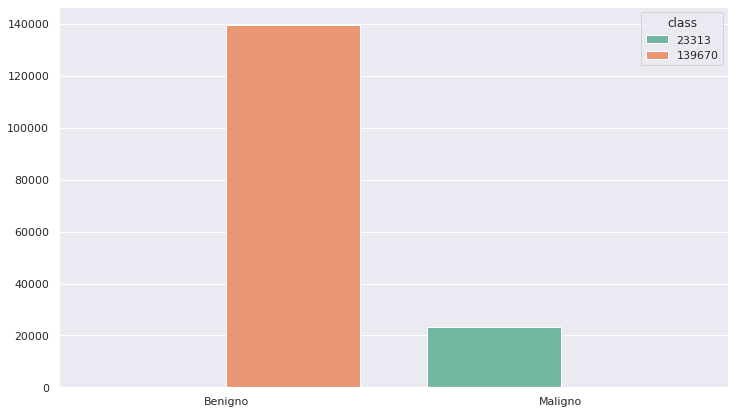

In [4]:
number = androcrawl['class'].value_counts()
sns.set(rc={"figure.figsize":(12, 7)})
sns.barplot(x = ["Benigno","Maligno"], y = number, hue = number, palette = "Set2").set(xlabel='', ylabel='')

**Proporção de benignos e maligos**

In [5]:
proportion = number[0] / number[1]
print('Maligno 1 : %.2f Benignos'%proportion)

Maligno 1 : 5.99 Benignos


**Top 5 permissões mais utilizadas por benignos e malignos**

In [6]:
permissions_class_sum = androcrawl.groupby('class').sum().loc[:,]
permissions_ben = permissions_class_sum.loc[0].sort_values(ascending=False)[:5]
permissions_mal = permissions_class_sum.loc[1].sort_values(ascending=False)[:5]

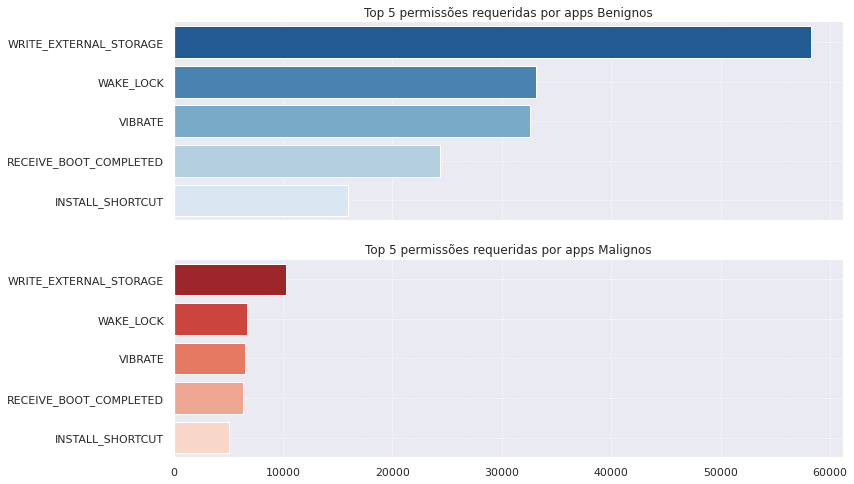

In [7]:
fig, axs = plt.subplots(figsize=(12, 8), ncols=1, nrows=2, sharex=True)

sns.barplot(y=permissions_ben.index, x=permissions_ben.values, palette="Blues_r", ax=axs[0])
axs[0].set_title('Top 5 permissões requeridas por apps Benignos')
axs[0].grid(linestyle='dotted')
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)

sns.barplot(y=permissions_mal.index, x=permissions_mal.values, palette='Reds_r', ax=axs[1])
axs[1].set_title('Top 5 permissões requeridas por apps Malignos')
axs[1].grid(linestyle='dotted')
axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)

**Top 10 permissões mais requeridas**

In [8]:
permissions_sum = androcrawl.sum().loc[:,]
permissions_sum.sort_values(ascending=False)

WRITE_EXTERNAL_STORAGE            68612
WAKE_LOCK                         39882
VIBRATE                           39051
RECEIVE_BOOT_COMPLETED            30750
class                             23313
INSTALL_SHORTCUT                  21046
WRITE_HISTORY_BOOKMARKS           10719
UNINSTALL_SHORTCUT                 9988
SET_WALLPAPER                      8497
WRITE_CONTACTS                     4103
MODIFY_AUDIO_SETTINGS              3702
READ_LOGS                          3294
FLASHLIGHT                         3002
DISABLE_KEYGUARD                   2634
INSTALL_PACKAGES                   2103
PROCESS_OUTGOING_CALLS             1730
WRITE_CALENDAR                     1462
KILL_BACKGROUND_PROCESSES          1128
CHANGE_COMPONENT_ENABLED_STATE      869
MODIFY_PHONE_STATE                  851
SET_ORIENTATION                     739
STATUS_BAR                          653
DEVICE_POWER                        478
EXPAND_STATUS_BAR                   469
WRITE_SECURE_SETTINGS               418


In [9]:
top_permissions_sum = permissions_sum.loc[:].sort_values(ascending=False)[:10]

<AxesSubplot:>

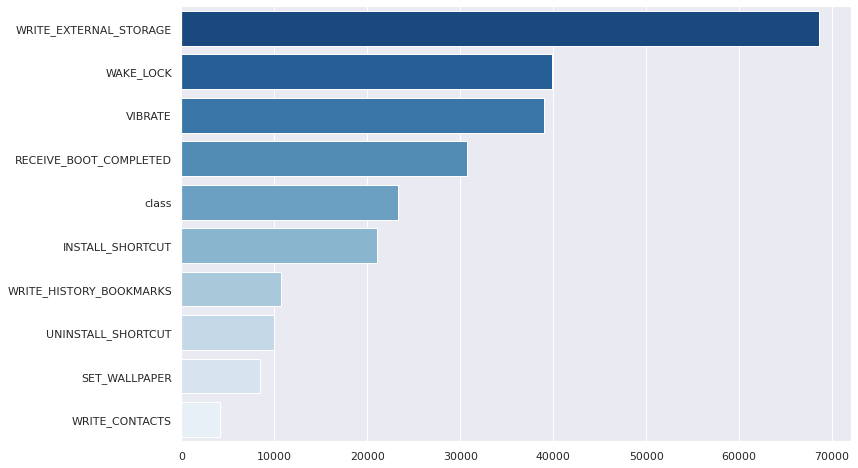

In [10]:
fig, axs = plt.subplots(figsize=(12, 8), ncols=1, nrows=1, sharex=True)

sns.barplot(y=top_permissions_sum.index, x=top_permissions_sum.values, palette="Blues_r")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3230624e-876d-4f9f-a1ca-0058a560220a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>